# __Datasets Merge__

Create a third dataset by mergin the Query and Hashtags datasets

In [1]:
import os
import pandas as pd

In [2]:
DATA_PATH = 'data/tweets/'

week_list = [week_dir for week_dir in os.listdir(DATA_PATH) if os.path.isdir(DATA_PATH+week_dir) and not week_dir.endswith('.ipynb_checkpoints')]
print('Amount of extracted weeks: ', len(week_list))

Amount of extracted weeks:  26


In [3]:
week_list.sort()
week_list.remove('week_pr_01')
week_list.insert(week_list.index('week_12')+1, 'week_pr_01')
week_list.remove('week_pr_02')
week_list.insert(week_list.index('week_pr_01')+1, 'week_pr_02')
week_list.remove('week_pr_03')
week_list.insert(week_list.index('week_17')+1, 'week_pr_03')
week_list.remove('week_pr_04')
week_list.insert(week_list.index('week_21')+1, 'week_pr_04')

print(week_list)

['week_01', 'week_02', 'week_03', 'week_04', 'week_05', 'week_06', 'week_07', 'week_08', 'week_09', 'week_10', 'week_11', 'week_12', 'week_pr_01', 'week_pr_02', 'week_13', 'week_14', 'week_15', 'week_16', 'week_17', 'week_pr_03', 'week_18', 'week_19', 'week_20', 'week_21', 'week_pr_04', 'week_22']


In [4]:
day_list = ['day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6', 'day_7']

for week in week_list:
    print('\nMerging: '+week)
    week_df_list = []
    for day in day_list:
        df_list = []
        file_list = [file for file in os.listdir(DATA_PATH+week) if file.startswith(day) and file.endswith('.parquet')]
        for file in file_list:
            df_list.append(pd.read_parquet(DATA_PATH+week+'/'+file))
        print(f'{day} - mergin files: {file_list}')
        merged_df = pd.concat(df_list, ignore_index=True)
        merged_df.drop_duplicates(inplace=True)
        merged_df['date'] = pd.to_datetime(merged_df['date'])
        merged_df.sort_values(by='date', inplace=True)
        week_df_list.append(merged_df)
        merged_df.to_parquet(DATA_PATH+week+f'/merged_{day}.parquet', index=False)
    merged_week_df = pd.concat(week_df_list, ignore_index=True)
    merged_week_df.drop_duplicates(inplace=True)
    merged_week_df.sort_values(by='date', inplace=True)
    merged_week_df.to_parquet(DATA_PATH+week+f'/merged_{week}.parquet')


Merging: week_01
day_1 - mergin files: ['day_1_2021-04-25_hashtags_ext.parquet', 'day_1_2021-04-25_query_ext.parquet']
day_2 - mergin files: ['day_2_2021-04-26_hashtags_ext.parquet', 'day_2_2021-04-26_query_ext.parquet']
day_3 - mergin files: ['day_3_2021-04-27_hashtags_ext.parquet', 'day_3_2021-04-27_query_ext.parquet']
day_4 - mergin files: ['day_4_2021-04-28_hashtags_ext.parquet', 'day_4_2021-04-28_query_ext.parquet']
day_5 - mergin files: ['day_5_2021-04-29_hashtags_ext.parquet', 'day_5_2021-04-29_query_ext.parquet']
day_6 - mergin files: ['day_6_2021-04-30_hashtags_ext.parquet', 'day_6_2021-04-30_query_ext.parquet']
day_7 - mergin files: ['day_7_2021-05-01_hashtags_ext.parquet', 'day_7_2021-05-01_query_ext.parquet']

Merging: week_02
day_1 - mergin files: ['day_1_2021-05-02_hashtags_ext.parquet', 'day_1_2021-05-02_query_ext.parquet']
day_2 - mergin files: ['day_2_2021-05-03_hashtags_ext.parquet', 'day_2_2021-05-03_query_ext.parquet']
day_3 - mergin files: ['day_3_2021-05-04_hasht

## __Merged Dataset Quantitative Analysis__

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib widget

In [6]:
tweets_amount_list = []

for week in week_list:
    df = pd.read_parquet(DATA_PATH+week+f'/merged_{week}.parquet')
    tweets_amount_list.append((week, df.shape[0]))
    
tweets_amount_list

[('week_01', 141280),
 ('week_02', 122068),
 ('week_03', 221369),
 ('week_04', 196475),
 ('week_05', 255865),
 ('week_06', 160194),
 ('week_07', 172813),
 ('week_08', 139144),
 ('week_09', 267384),
 ('week_10', 271970),
 ('week_11', 207538),
 ('week_12', 88968),
 ('week_pr_01', 58979),
 ('week_pr_02', 57902),
 ('week_13', 206344),
 ('week_14', 78048),
 ('week_15', 62816),
 ('week_16', 97904),
 ('week_17', 40400),
 ('week_pr_03', 163029),
 ('week_18', 61427),
 ('week_19', 70757),
 ('week_20', 137439),
 ('week_21', 49612),
 ('week_pr_04', 22960),
 ('week_22', 45248)]

In [7]:
weekly_tweets_amount = pd.DataFrame(tweets_amount_list, columns=['week', 'tweets_amount'])
weekly_tweets_amount.shape

(26, 2)

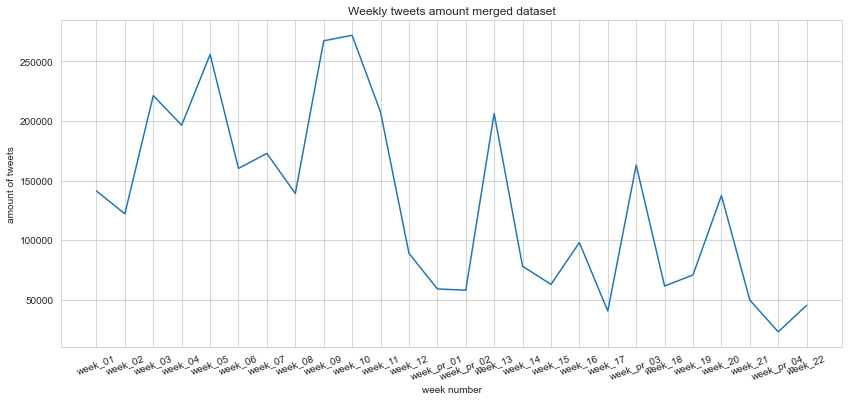

In [8]:
plt.figure(figsize=(14,6))
sns.set_style("whitegrid")
ax = sns.lineplot(x='week', y='tweets_amount', data=weekly_tweets_amount)
ax.set(xlabel='week number', ylabel='amount of tweets')
plt.title('Weekly tweets amount merged dataset')
plt.xticks(rotation=20)
plt.show()

In [9]:
total_tweets = weekly_tweets_amount['tweets_amount'].sum()
print(f'The total of tweets in all {len(week_list)} weeks is: {total_tweets}')

The total of tweets in all 26 weeks is: 3397933
